In [64]:
import numpy as np
import matplotlib.pyplot as plt
from hlsf.models import *
%matplotlib inline

In [65]:
config = 'H'
lamp = 'Ar'
nb_line = 230

In [66]:
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits")
wavelines = list(lsf_data.get_line_list().values())
lsf_data.get_line_list().keys()

dict_keys([250, 251, 252, 253, 254])

## Test Lorentzian model didn't work for LSF variation

In [67]:
mod = LORENTZIAN_MODEL.from_json('lorentzian_model.json')

Destructor called


In [68]:
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_H_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_H.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_H.fits")

In [69]:
data = lsf1.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']

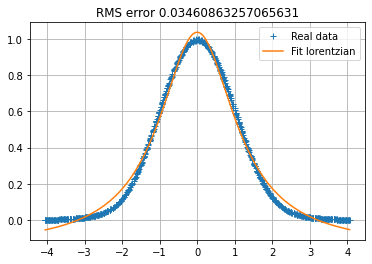

In [70]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Fit lorentzian'])
plt.title(f'RMS error {mod.error_rms(lsf1, nb_line)}')
plt.show()

## Test for only one line

In [71]:
mod1 = GAUSSIAN_MODEL_2.from_json('gauss_one_line.json')

Destructor called


In [72]:
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_H_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_H.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_H.fits")

In [73]:
data = lsf1.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']

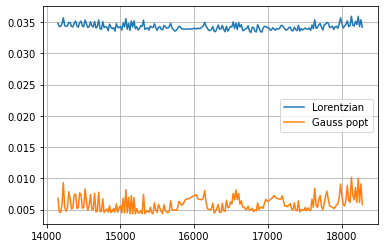

In [74]:
fig = plt.figure()
ax = plt.axes()
mod.plot_error_rms(lsf1, range(lsf1._lineUp, lsf1._lineDown+1), ax)
mod1.plot_error_rms(lsf1, range(lsf1._lineUp, lsf1._lineDown+1), ax)
plt.legend(['Lorentzian', 'Gauss popt'])
plt.grid()
plt.show()

## Gaussian model, quite good

In [75]:
mod = GAUSSIAN_MODEL(lsf_data)
lsf1 = LSF_DATA(f"../exposures/ARC-linspace256_CLEAR_20MAS_{config}_PRM.fits", "../exposures/line_catalog_linspace256.fits", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits")
mod.error_rms(lsf1, nb_line)

Destructor called


0.006510920047011961

In [76]:
mod1 = GAUSSIAN_MODEL_2(lsf_data)
mod1.error_rms(lsf1, nb_line)

Destructor called


0.005647543551483326

In [77]:
data = lsf1.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']

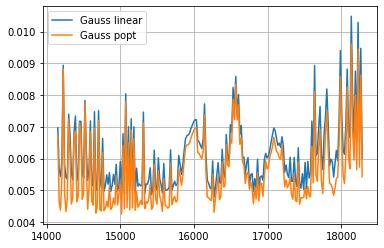

In [78]:
fig = plt.figure()
ax = plt.axes()
mod.plot_error_rms(lsf1, np.arange(lsf1._lineUp, lsf1._lineDown+1), ax)
mod1.plot_error_rms(lsf1, np.arange(lsf1._lineUp, lsf1._lineDown+1), ax)
plt.grid()
plt.legend(['Gauss linear', 'Gauss popt'])
plt.show()

## Moffat, take times

In [80]:
mod_moffat_2 = MOFFAT_MODEL_2.from_json('moffat_model_2.json')

Destructor called


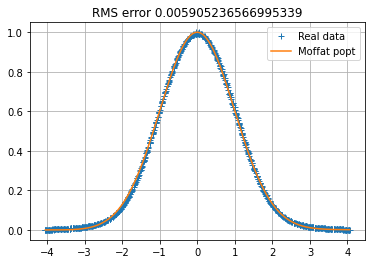

In [81]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_moffat_2.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Moffat popt'])
plt.title(f'RMS error {mod_moffat_2.error_rms(lsf1, nb_line)}')
plt.show()

In [25]:
mod_moffat_2.error_rms(lsf1, nb_line)

0.005905236566995339

## Bad case for Gauss Hermite model

In [82]:
mod_hermite_1 = GAUSS_HERMITE_MODEL(lsf_data, deg=11)

In [83]:
mod_hermite_2 = GAUSS_HERMITE_MODEL_2(lsf_data, deg=11)

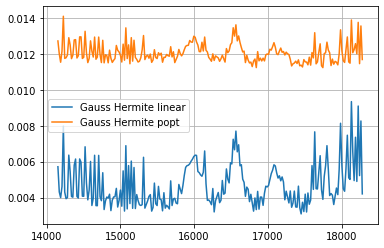

In [84]:
fig = plt.figure()
ax = plt.axes()
mod_hermite_1.plot_error_rms(lsf1, np.arange(lsf1._lineUp, lsf1._lineDown+1), ax)
mod_hermite_2.plot_error_rms(lsf1, np.arange(lsf1._lineUp, lsf1._lineDown+1), ax)
plt.grid()
plt.legend(['Gauss Hermite linear', 'Gauss Hermite popt'])
plt.show()

## Test case for numerous lamps

In [85]:
lamps = ["Ar", "Kr", "Ne", "Xe"]
config = 'HK'

In [ ]:
for i in range(len(lamps)):
    for j in range(i+1, len(lamps)):
        lsf_data = [LSF_DATA(f'../exposures/ARC-{lamps[i]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[i]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits"), 
            LSF_DATA(f'../exposures/ARC-{lamps[j]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[j]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits")]
        mod = GAUSSIAN_MODEL_2(lsf_data)
        mod.write_json(f'{str.lower(mod.__class__.__name__)}_{config}_{lamps[i]}-{lamps[j]}.json')

In [86]:
mod_gauss = GAUSSIAN_MODEL_2.from_json('gaussian_model_2_HK_Ar-Kr.json')
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_HK_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_HK.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_HK.fits", file_flat="../exposures/FLAT-CONT2_CLEAR_20MAS_HK_PRM.fits")

/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/l

In [87]:
mod_gauss._popt

[9.425063227865992,
 -0.8463935870195247,
 -0.8371198276898448,
 2.4152391630958827,
 3.610295424929629,
 0.012775119321503874]

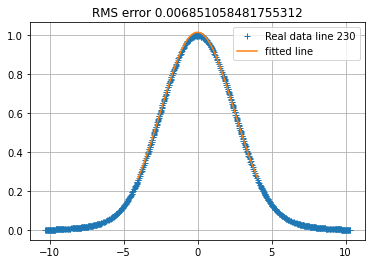

In [89]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_gauss.plot(w_0, waves, ax)
plt.grid()
plt.legend([f'Real data line {nb_line}', 'fitted line'])
plt.title(f'RMS error {mod_gauss.error_rms(lsf1, nb_line)}')
plt.show()